# Task-3 To Explore Unsupervised Machine Learning

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [94]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn import datasets

In [95]:
#importing dataset
data=pd.read_csv(r"C:\Users\HP\Dropbox\My PC (DESKTOP-A6DAH59)\Downloads\Iris.csv")

In [96]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [97]:
data.shape

(150, 6)

Our dataset contains 150 rows and 6 columns

In [98]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [99]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Our target variable is of object type which means it is a Catagorial variable.

### Checking for null values

In [100]:
pd.isnull(data).sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no missing values in the dataset

In [101]:
#to see the unique species in the column
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [102]:
#to count no of each species 
data['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

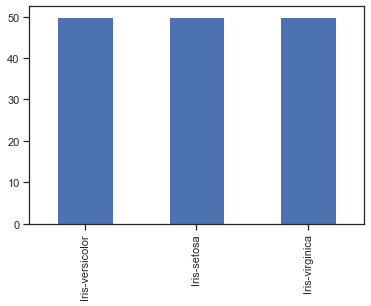

In [103]:
#plotting each specie using bar plot
data['Species'].value_counts().plot.bar()

### Preparing the dataset 

In [104]:
df=data.copy()

In [105]:
df1=df.drop("Species",axis=1)
df1.head()
#x=np.array(df1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


### Graphical Represntation

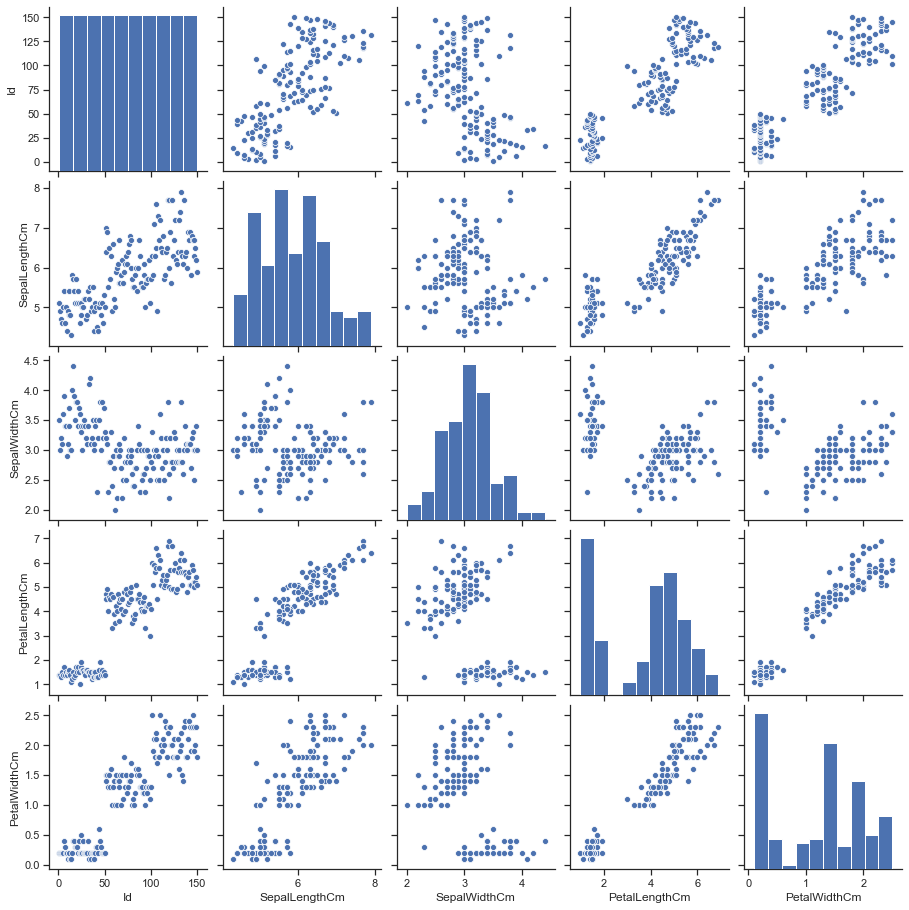

In [106]:
sn.set(style="ticks", color_codes=True)
sn.pairplot(df1)

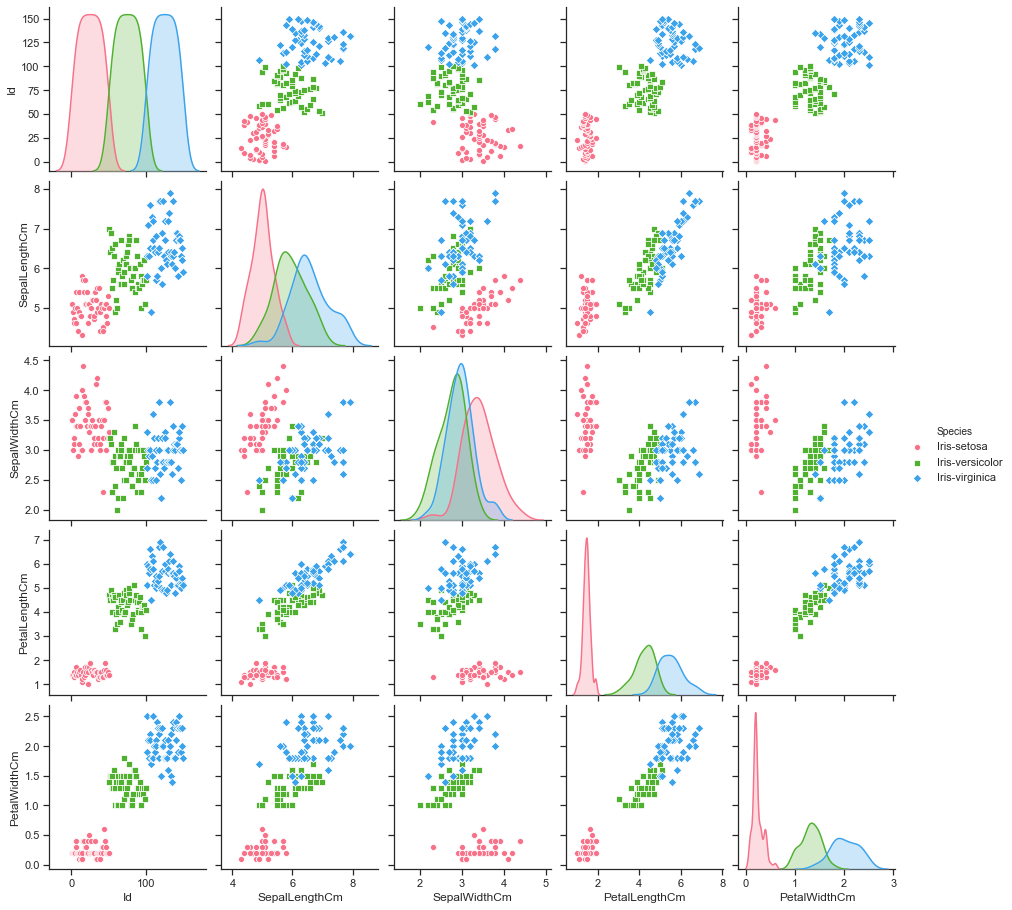

In [107]:
sn.pairplot(df,hue='Species',markers=["o", "s", "D"], palette="husl")

It tells relationship between each independent variable and species.

## Using Elbow method to Determine optimum no. of clusters

In [108]:
#creating an empty list
cl=[]

In [22]:
#using for loop to determine optimum no. of clusters
for cls in range(1,20):
    km=KMeans(n_clusters=cls)
    km.fit(df1)
    cl.append(km.inertia_)

In [23]:
frame=pd.DataFrame({'Cluster':range(1,20),'Inertia':cl})

In [24]:
frame.head()

,Cluster,Inertia
0,1,281918.324400
1,2,70616.298933
2,3,31326.886800
3,4,17819.682399
4,5,11485.973247


Text(0.5, 1.0, 'The Elbow Method using Inertia')

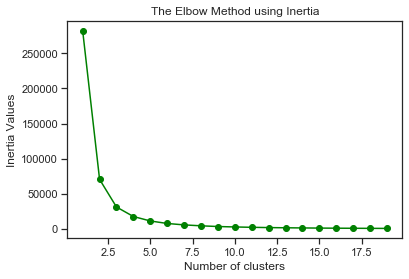

In [81]:
#plotting no. of clusters and inertia values
plt.plot(frame['Cluster'],frame['Inertia'],color='green', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Values') 
plt.title('The Elbow Method using Inertia')

### Scaling the data:

In [109]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df1)

In [110]:
pd.DataFrame(scaled_data).describe()

,0,1,2,3,4
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,3.996803e-17,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.720542e+00,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-8.602710e-01,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,0.000000e+00,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,8.602710e-01,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,1.720542e+00,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


In [111]:
cl_scaled=[]

In [112]:
#using for loop to determine optimum no. of clusters for scaled data
for scls in range(1,20):
    km=KMeans(n_clusters=scls,algorithm='auto', copy_x=True, init='k-means++', max_iter=600, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
    km.fit(df1)
    cl_scaled.append(km.inertia_)

In [113]:
Scaled_frame=pd.DataFrame({'Cluster':range(1,20),'Inertia':cl_scaled})

In [114]:
Scaled_frame.head(10)

,Cluster,Inertia
0,1,281918.324400
1,2,70616.298933
2,3,31365.589671
3,4,17819.682399
4,5,11441.178620
5,6,7904.187259
6,7,5919.627328
7,8,4574.560401
8,9,3569.639865
9,10,2964.478509


Text(0.5, 1.0, 'The Elbow Method using Inertia')

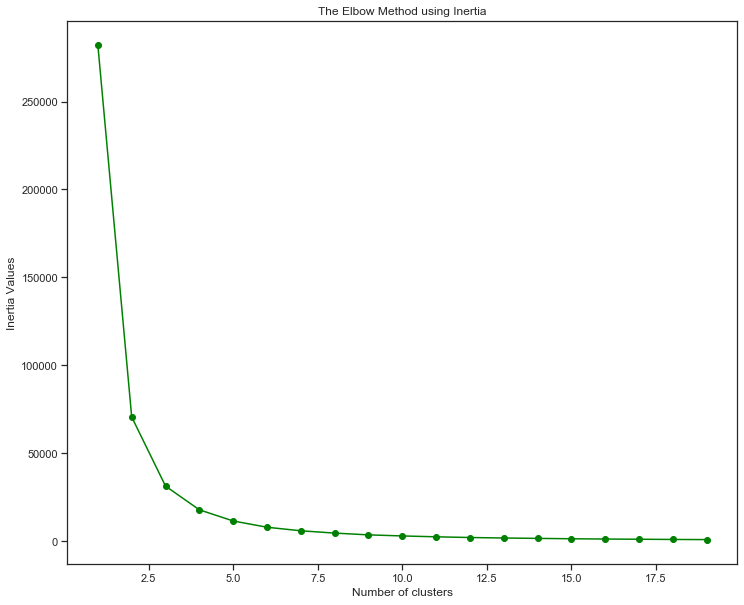

In [115]:
plt.figure(figsize=(12,10))

plt.plot(Scaled_frame['Cluster'],frame['Inertia'],color='green', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Values')
plt.title("The Elbow Method using Inertia")

We can conclude from the above curve that optimum no. of clusters is between 2.5-5 and above we can infer that we see the max fall in inertia value from 2 to 3. Therefore we can consider the optimum no. of clusters to be 3.

In [139]:
km = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
km.fit(scaled_data)
pred=km.predict(scaled_data)

In [136]:
#to show which ID belongs to which cluster
newdf=pd.DataFrame({'ID':df1['Id'], 'Cluster NO.':pred})
newdf.head()

,ID,Cluster NO.
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [53]:
pd.Series(pred).value_counts()

2    53
1    50
0    47
dtype: int64

### Visualising the cluster

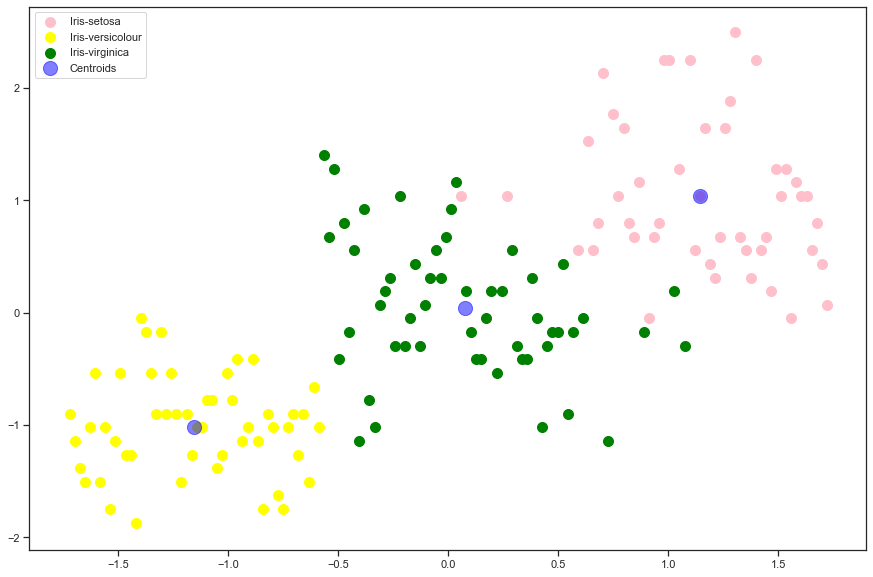

In [71]:
# Visualising the clusters 
plt.figure(figsize=(15,10))
plt.scatter(scaled_data[pred == 0, 0], scaled_data[pred == 0, 1], s = 100, c = 'pink', label = 'Iris-setosa')
plt.scatter(scaled_data[pred == 1, 0], scaled_data[pred == 1, 1], s = 100, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(scaled_data[pred == 2, 0], scaled_data[pred == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5,label = 'Centroids',marker='o');
plt.legend()